In [ ]:
#TSWA_PRACTICAL_3_NLP_TOKENIZATION_DEPENDENCY_GRAMMAR
!pip install nltk

In [ ]:
import nltk

In [ ]:
# Example (2) Take the sentence
sentence1 = "The gray tortoise is persistent and he is crossing jumping over the slipping lazy white rabbit"
sentence1

'The gray tortoise is persistent and he is crossing jumping over the slipping lazy white rabbit'

In [ ]:
# Split the sentence into words
words = sentence1.split()
words

['The',
 'gray',
 'tortoise',
 'is',
 'persistent',
 'and',
 'he',
 'is',
 'crossing',
 'jumping',
 'over',
 'the',
 'slipping',
 'lazy',
 'white',
 'rabbit']

In [ ]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
# pos_tag the words by using the shallow parssing
pos_tags1 = nltk.pos_tag(sentence1.split())
pos_tags1

[('The', 'DT'),
 ('gray', 'JJ'),
 ('tortoise', 'NN'),
 ('is', 'VBZ'),
 ('persistent', 'JJ'),
 ('and', 'CC'),
 ('he', 'PRP'),
 ('is', 'VBZ'),
 ('crossing', 'VBG'),
 ('jumping', 'VBG'),
 ('over', 'IN'),
 ('the', 'DT'),
 ('slipping', 'VBG'),
 ('lazy', 'JJ'),
 ('white', 'JJ'),
 ('rabbit', 'NN')]

In [ ]:
import spacy

In [ ]:
# Create an object which can invoke the repositroy "en_core_web_sm"
nlp1 = spacy.load("en_core_web_sm")

In [ ]:
import pandas as pd

In [ ]:
spacy_pos_tagged1 = [(word, word.tag_, word.pos_) for word in nlp(sentence1)]
pd.DataFrame(spacy_pos_tagged1).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,The,gray,tortoise,is,persistent,and,he,is,crossing,jumping,over,the,slipping,lazy,white,rabbit
1,DT,JJ,NN,VBZ,JJ,CC,PRP,VBZ,VBG,VBG,IN,DT,VBG,JJ,JJ,NN
2,DET,ADJ,NOUN,AUX,ADJ,CCONJ,PRON,AUX,VERB,VERB,ADP,DET,VERB,ADJ,ADJ,NOUN


In [ ]:
# Example (2):
grammar = '''
            NP: {<DT>?<JJ>?<NN.*>}
            ADJP: {<JJ>}
            ADVP: {<RB.*>}
            PP: {<IN>}
            VP: {<MD>?<VB.*>+}
          '''

In [ ]:
# display the post tagged sentence " The Brwon Fos is quick and juumping....."
pos_tagged_sent1 = nltk.pos_tag(sentence1.split())
pos_tagged_sent1

[('The', 'DT'),
 ('gray', 'JJ'),
 ('tortoise', 'NN'),
 ('is', 'VBZ'),
 ('persistent', 'JJ'),
 ('and', 'CC'),
 ('he', 'PRP'),
 ('is', 'VBZ'),
 ('crossing', 'VBG'),
 ('jumping', 'VBG'),
 ('over', 'IN'),
 ('the', 'DT'),
 ('slipping', 'VBG'),
 ('lazy', 'JJ'),
 ('white', 'JJ'),
 ('rabbit', 'NN')]

In [ ]:
# Create an object for regular expression parser for combining into phrases
rp1 = nltk.RegexpParser(grammar)
rp1

<chunk.RegexpParser with 5 stages>

In [ ]:
! pip install svgling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.1/67.1 kB 3.4 MB/s eta 0:00:00


In [ ]:
import svgling

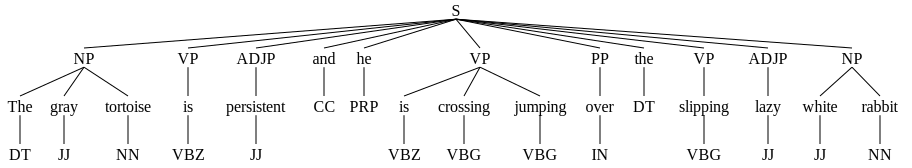

In [ ]:
# Perfrom the shallow parsing
shallow_parsed_sent1 = rp1.parse(pos_tagged_sent1)
shallow_parsed_sent1

In [ ]:
# Display the shallow parsed sentence in terms of phrase
print(shallow_parsed_sent1)

(S
  (NP The/DT gray/JJ tortoise/NN)
  (VP is/VBZ)
  (ADJP persistent/JJ)
  and/CC
  he/PRP
  (VP is/VBZ crossing/VBG jumping/VBG)
  (PP over/IN)
  the/DT
  (VP slipping/VBG)
  (ADJP lazy/JJ)
  (NP white/JJ rabbit/NN))


In [ ]:
from spacy import displacy

In [ ]:
# Creating depnednecy grammer tree
displacy.render(nlp1(sentence1), options={'distance': 100,'arrow_stroke': 1.5,'arrow_width': 8})